Importing the libraries


In [ ]:
import numpy as np
import pandas as pd

Importing the Dataset

In [ ]:
data= pd.read_csv("/content/CoronaTweetsSentimentAnalysis.csv")

Viewing Sample data

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [ ]:
data.shape

(1988, 6)

In [ ]:
data.isnull().sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

Visualization on Data

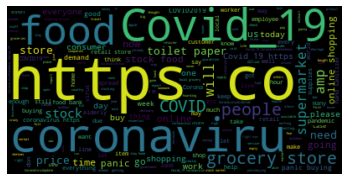

In [ ]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

textt = " ".join(OriginalTweet for OriginalTweet in data.OriginalTweet)

wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

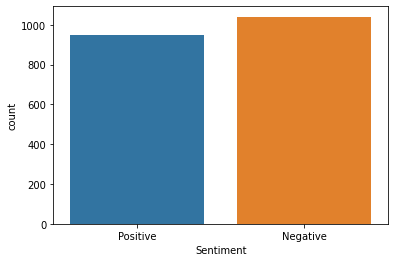

In [ ]:
import seaborn as sns
sns.countplot(x='Sentiment', data=data)

As the dataset is of tweets , checking whether the dataset has hashtags

In [ ]:
import re
data['hashtag'] = data['OriginalTweet'].apply(lambda x: re.findall(r"#(\w+)", x))

Adding the hashtag as a seperate feature to have a indepth view about the hashtag data in the text

In [ ]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,hashtag
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,"[Amazon, coronavirus]"
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,"[Panic, NewYork, healthcare, BigApple, coronav..."
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,"[coronavirus, SuperTuesday]"
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,"[SuperTuesdsy, PowerTalk, Covid_19, SayEntrepr..."
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,[]
...,...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive,[]
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive,[]
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,[]
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,[CoronaVirus]


Preprocessing the text data - removing unwanted links,signs(@,#),numbers from the text

In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) 
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet = re.sub(r'(.)1+', r'1', tweet)
    tweet = re.sub('[0-9]+', '', tweet)
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ")
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

data['tweet_clean'] = data['OriginalTweet'].apply(cleaner)

In [ ]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,hashtag,tweet_clean
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,"[Amazon, coronavirus]","When I ' t find hand at , I turned to . But . ..."
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,"[Panic, NewYork, healthcare, BigApple, coronav...",Panic City as anxious stock up on food & ; med...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,"[coronavirus, SuperTuesday]",Voting in the age of = hand ?
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,"[SuperTuesdsy, PowerTalk, Covid_19, SayEntrepr...",Best quality at unbelievably low available to ...
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,[],While we were busy watching election and braci...
...,...,...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive,[],Just been through K ? New World which is busy ...
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive,[],"Even though the Law Library is closed , ALL ca..."
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,[],", will you call on the General Assembly to ena..."
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,[CoronaVirus],Meanwhile In A Supermarket in -- People dance ...


Removing punctuations from the text

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";","=","'",":", "$","--","&", "!",'"',",","-","<br />"))
    return final

data['tweet_clean'] = data['tweet_clean'].apply(remove_punctuation)
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,hashtag,tweet_clean
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,"[Amazon, coronavirus]",When I t find hand at I turned to But for ...
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,"[Panic, NewYork, healthcare, BigApple, coronav...",Panic City as anxious stock up on food medic...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,"[coronavirus, SuperTuesday]",Voting in the age of hand
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,"[SuperTuesdsy, PowerTalk, Covid_19, SayEntrepr...",Best quality at unbelievably low available to ...
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,[],While we were busy watching election and braci...


Selecting the feature and the label

In [ ]:
x=data["tweet_clean"]
y=data["Sentiment"]

Splitting training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Using LabelEncoder , converting label(positive and negative) into 0 and 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

Using TfidfVectorizer converting text(Feature) into vector

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

T_vect = TfidfVectorizer(max_features=5000)
T_vect.fit(data['tweet_clean'])

Train_X_Tfidf = T_vect.transform(x_train)
Test_X_Tfidf = T_vect.transform(x_test)

Multinomial Naive bayes model 


In [ ]:
from sklearn import model_selection, naive_bayes, svm

In [ ]:
NB = naive_bayes.MultinomialNB()
NB.fit(Train_X_Tfidf,y_train)

MultinomialNB()

In [ ]:
predictions_NB = NB.predict(Test_X_Tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

print("Naive Bayes :  Test Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes :  Accuracy Score ->  63.17907444668008


Support Vector Machine - SVM

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=2, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)

SVC(degree=2, gamma='auto', kernel='linear')

In [ ]:
predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  62.776659959758554


Hyper parameter tuning to see on which value of gamma the model has performed better

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform

grid_values = {'gamma':[0.01, 0.1, 1, 10, 100]}

search = GridSearchCV(SVM, param_grid = grid_values, scoring='accuracy', n_jobs=-1, cv=3)

result = search.fit(Train_X_Tfidf, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6244131455399061
Best Hyperparameters: {'gamma': 0.01}


LSTM - Long Short Term Memory

Converting the text into vectors as per the required shapes for LSTM

Tokenizing the sentence into words 

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=100, lower='True')
tokenizer.fit_on_texts(x_train)

Converting the tokenized words into vectors

In [ ]:
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test) 
vocab_size=len(tokenizer.word_index)+1

Padding the sequence to Equal Length

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen=50
X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)
print(X_train[3:])

[[ 1 43  9 ...  0  0  0]
 [11 35  7 ...  0  0  0]
 [12 43 88 ...  0  0  0]
 ...
 [ 2 21 26 ...  0  0  0]
 [56 90  6 ...  0  0  0]
 [ 4 65  9 ...  0  0  0]]


In [ ]:
X_train.shape

(1491, 50)

Converting the Shape of the sequence into required LSTM shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,SimpleRNN, Embedding
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

X_train=np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
X_test=np.array(X_test).reshape((X_test.shape[0],X_train.shape[1],1))
print(X_test.shape)

(1491, 50, 1)
(497, 50, 1)


Building LSTM model

In [ ]:
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(1000,128,input_length=(maxlen)))
model_lstm.add(LSTM(128))
model_lstm.add(Flatten())
model_lstm.add(Dense(1, activation = 'tanh'))
model_lstm.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model_lstm.fit(X_train,y_train,epochs=30,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/30
10/10 [==============================] - 8s 292ms/step - loss: 0.6927 - accuracy: 0.5134 - val_loss: 0.7000 - val_accuracy: 0.4615
Epoch 2/30
10/10 [==============================] - 2s 246ms/step - loss: 0.6913 - accuracy: 0.5302 - val_loss: 0.6989 - val_accuracy: 0.4615
Epoch 3/30
10/10 [==============================] - 2s 239ms/step - loss: 0.6914 - accuracy: 0.5302 - val_loss: 0.6998 - val_accuracy: 0.4615
Epoch 4/30
10/10 [==============================] - 2s 237ms/step - loss: 0.6919 - accuracy: 0.5302 - val_loss: 0.7002 - val_accuracy: 0.4615
Epoch 5/30
10/10 [==============================] - 2s 237ms/step - loss: 0.6917 - accuracy: 0.5302 - val_loss: 0.6959 - val_accuracy: 0.4615
Epoch 6/30
10/10 [==============================] - 2s 237ms/step - loss: 0.6920 - accuracy: 0.5302 - val_loss: 0.6979 - val_accuracy: 0.4615
Epoch 7/30
10/10 [==============================] - 3s 335ms/step - loss: 0.6914 - accuracy: 0.5302 - val_loss: 0.6985 - val_accuracy: 0.4615
Epoch 

In [ ]:
score = model_lstm.evaluate(X_test, y_test)
print("Test Accuracy:", score[0]) 


16/16 [==============================] - 1s 38ms/step - loss: 0.6896 - accuracy: 0.5453
Test Accuracy: 0.6895623207092285


As we can see LSTM works better than bothb SVM and Naive Bayes 
In this case , LSTM (68.9%) > Naive Bayes (63%) > SVM (62.7%).
On this text data , both Naive Bayes and SVM performed almost the same .